In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
import os

In [2]:
accepted_diff = 0.03 
def linear_regression_equality(y_true, y_pred):
    diff = K.abs(y_true-y_pred)
    return K.mean(K.cast(diff < accepted_diff, tf.float32))

In [4]:
model = tf.keras.models.load_model("D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\saved_model\\my_regression_model2_divided", 
                                   custom_objects = {'linear_regression_equality': linear_regression_equality})

In [5]:
resolution = 250

def preprocess_img(onimg, directory):
    testing_dir = 'D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\neural_net\\Testing\\' + directory + '\\'
    on_file = testing_dir + onimg

    onimg = load_img(on_file, color_mode = "grayscale", target_size = (resolution, int(1.148*resolution)), interpolation = 'nearest')
    onimg = onimg.crop((int(0.1*resolution), 0, int(1.1*resolution), resolution))
    onimg = np.reshape(onimg, (1, resolution, resolution, 1))
    onimg = onimg.astype(np.int16)

    difference = (onimg)/np.amax(onimg)
    
    return difference

def preprocess_synth_img(imgname):
        
    directory = 'D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\regression_neural_net\\images\\'
    
    valimg = load_img(directory + str(imgname), color_mode="grayscale", target_size = (resolution, resolution))
    
    #I divide by 12000 because the images are saved with a maximum of 12000 in order to normalise to what the neural network
    #has trained on
    valimg = np.array(valimg)/12000
    valimg = np.reshape(valimg, (1, resolution, resolution, 1))
    
    return valimg

In [6]:
def create_prediction(directory):
    files0 = os.listdir('D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\neural_net\\Testing\\' + directory)

    test_images0 = [preprocess_img(file, directory) for file in files0]
    classes = [model(image) for image in test_images0]
    classes_int = []
    for thing in classes:
        classes_int.append(np.array(thing)[0][0])
        
    return classes_int
    

In [7]:
dictionary_of_predictions = {}
dictionary_of_predictions['5.2 - 1'] = create_prediction('2.16.2021 scan 3 f5.2')
dictionary_of_predictions['2.6'] = create_prediction('2.16.2021 scan 6 f2.6')
dictionary_of_predictions['1.3'] = create_prediction('2.17.2021 scan 8 f1.3')
dictionary_of_predictions['0.78'] = create_prediction('2.17.2021 scan 11 f0.78')
dictionary_of_predictions['7.8'] = create_prediction('2.17.2021 scan 13 f7.8')
dictionary_of_predictions['10.4 - 1'] = create_prediction('2.17.2021 scan 15 f10.4')
dictionary_of_predictions['15.6 - 1'] = create_prediction('2.17.2021 scan 16 f15.6')
dictionary_of_predictions['5.2 - 2'] = create_prediction('2.21.2021 scan 5 f5.2')
dictionary_of_predictions['26'] = create_prediction('2.21.2021 scan 10 f26')
dictionary_of_predictions['20.8'] = create_prediction('2.21.2021 scan 12 f20.8')
dictionary_of_predictions['15.6 - 2'] = create_prediction('2.21.2021 scan 13 f15.6')
dictionary_of_predictions['10.4 - 2'] = create_prediction('2.21.2021 scan 14 f10.4')


In [8]:
def extract_time(img):
    lst = img.split('_')
    return float(lst[3])


def extract_times(directory):
    files0 = os.listdir('D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\neural_net\\Testing\\' + directory)
    
    times = [extract_time(img) for img in files0]
    
    return times

In [9]:
dictionary_of_times = {}
dictionary_of_times['5.2 - 1'] = extract_times('2.16.2021 scan 3 f5.2')
dictionary_of_times['2.6'] = extract_times('2.16.2021 scan 6 f2.6')
dictionary_of_times['1.3'] = extract_times('2.17.2021 scan 8 f1.3')
dictionary_of_times['0.78'] = extract_times('2.17.2021 scan 11 f0.78')
dictionary_of_times['7.8'] = extract_times('2.17.2021 scan 13 f7.8')
dictionary_of_times['10.4 - 1'] = extract_times('2.17.2021 scan 15 f10.4')
dictionary_of_times['15.6 - 1'] = extract_times('2.17.2021 scan 16 f15.6')
dictionary_of_times['5.2 - 2'] = extract_times('2.21.2021 scan 5 f5.2')
dictionary_of_times['26'] = extract_times('2.21.2021 scan 10 f26')
dictionary_of_times['20.8'] = extract_times('2.21.2021 scan 12 f20.8')
dictionary_of_times['15.6 - 2'] = extract_times('2.21.2021 scan 13 f15.6')
dictionary_of_times['10.4 - 2'] = extract_times('2.21.2021 scan 14 f10.4')


Text(0.5, 1.0, "Model's UISO level predictions for different fluences")

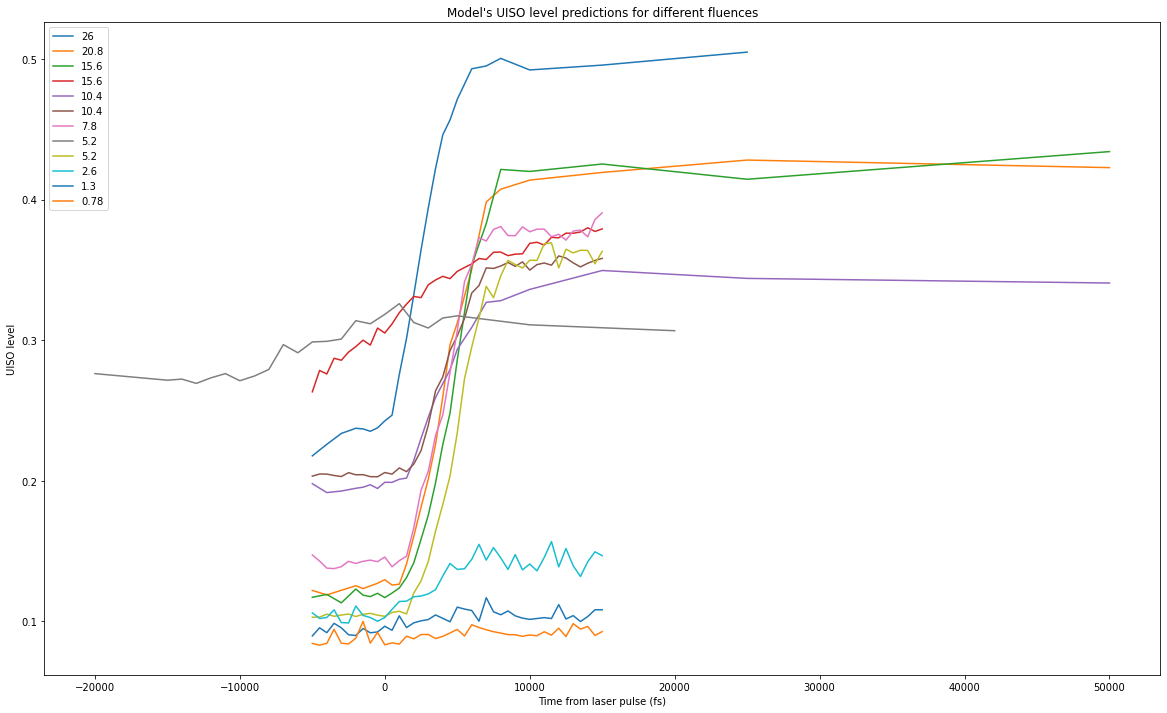

In [10]:
plt.figure(0, figsize = (20, 12))

plt.plot(np.array(dictionary_of_times['26']), dictionary_of_predictions['26'], label = '26')
plt.plot(np.array(dictionary_of_times['20.8']), dictionary_of_predictions['20.8'], label = '20.8')
plt.plot(np.array(dictionary_of_times['15.6 - 2']), dictionary_of_predictions['15.6 - 2'], label = '15.6')
plt.plot(np.array(dictionary_of_times['15.6 - 1']), dictionary_of_predictions['15.6 - 1'], label = '15.6')
plt.plot(np.array(dictionary_of_times['10.4 - 2']), dictionary_of_predictions['10.4 - 2'], label = '10.4')
plt.plot(np.array(dictionary_of_times['10.4 - 1']), dictionary_of_predictions['10.4 - 1'], label = '10.4')
plt.plot(np.array(dictionary_of_times['7.8']), dictionary_of_predictions['7.8'], label = '7.8')
plt.plot(np.array(dictionary_of_times['5.2 - 2']), dictionary_of_predictions['5.2 - 2'], label = '5.2')
plt.plot(np.array(dictionary_of_times['5.2 - 1']), dictionary_of_predictions['5.2 - 1'], label = '5.2')
plt.plot(np.array(dictionary_of_times['2.6']), dictionary_of_predictions['2.6'], label = '2.6')
plt.plot(np.array(dictionary_of_times['1.3']), dictionary_of_predictions['1.3'], label = '1.3')
plt.plot(np.array(dictionary_of_times['0.78']), dictionary_of_predictions['0.78'], label = '0.78')

plt.legend()
plt.xlabel('Time from laser pulse (fs)')
plt.ylabel('UISO level')
plt.title('Model\'s UISO level predictions for different fluences')